In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def g(x):
    A=np.eye(2)
    b=np.array([[98],
               [-72]]) 
    c=(49**2)+(36**2)
    return (np.dot(x.T,np.dot(A,x))+np.dot(b.T,x)+c).item()

In [8]:
def grad(x):
    A=np.eye(2)
    b=np.array([[98],
               [-72]])
    return 2*np.dot(A,x)+b

In [14]:
def norm(x):
    x = x.flatten()
    return np.sqrt(np.sum(x**2))


Tolerance (τ)       Exact Iterations    Exact Final Point                                 Fixed Iterations    Fixed Final Point                                 
0.1                 1                   [-49.  36.]                                       3661                [-48.96063929  35.96916745]                       
0.01                1                   [-49.  36.]                                       4812                [-48.99607069  35.99692204]                       
0.001               1                   [-49.  36.]                                       5962                [-48.99960696  35.99969212]                       
0.0001              1                   [-49.  36.]                                       7112                [-48.99996068  35.9999692 ]                       
1e-05               1                   [-49.  36.]                                       8262                [-48.99999607  35.99999692]                       
1e-06               1             

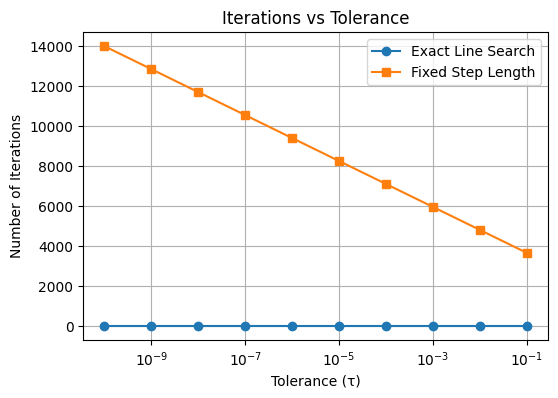

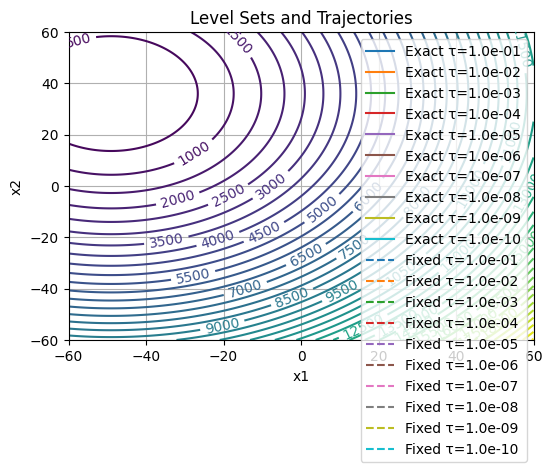

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Function definitions
def g(x):
    A = np.eye(2)
    b = np.array([[98], [-72]])
    c = 3601
    return (x.T @ A @ x + b.T @ x + c).item()

def grad_g(x):
    A = np.eye(2)
    b = np.array([[98], [-72]])
    return 2 * A @ x + b

def norm(x):
    return np.sqrt(np.sum(x**2))

# Line search for exact step size
def exact_line_search(x, grad):
    num = grad.T @ grad
    denom = 2 * grad.T @ grad  # Since A = I
    return (num / denom).item()

# Gradient Descent with Exact Line Search
def gradient_descent_exact(x0, tol):
    x = x0
    k = 0
    trajectory = [x.flatten()]
    while norm(grad_g(x)) > tol:
        grad = grad_g(x)
        eta = exact_line_search(x, grad)
        x = x - eta * grad
        trajectory.append(x.flatten())
        k += 1
    return x, k, trajectory

# Gradient Descent with Fixed Step Length
def gradient_descent_fixed(x0, tol, eta):
    x = x0
    k = 0
    trajectory = [x.flatten()]
    while norm(grad_g(x)) > tol:
        x = x - eta * grad_g(x)
        trajectory.append(x.flatten())
        k += 1
    return x, k, trajectory

# Initial point and tolerances
x0 = np.array([[11], [-11]])
tolerances = [10**-p for p in range(1, 11)]

# Run experiments
results_exact = []
results_fixed = []
eta_fixed = 0.001

for tol in tolerances:
    # Exact Line Search
    x_exact, k_exact, traj_exact = gradient_descent_exact(x0, tol)
    results_exact.append((tol, k_exact, x_exact.flatten()))
    
    # Fixed Step Length
    x_fixed, k_fixed, traj_fixed = gradient_descent_fixed(x0, tol, eta_fixed)
    results_fixed.append((tol, k_fixed, x_fixed.flatten()))

# Print results in a structured format
print(f"{'Tolerance (τ)':<20}{'Exact Iterations':<20}{'Exact Final Point':<50}{'Fixed Iterations':<20}{'Fixed Final Point':<50}")
print("="*160)

for tol, k_exact, x_exact in results_exact:
    for _, k_fixed, x_fixed in results_fixed:
        if tol == _:
            print(f"{tol:<20}{k_exact:<20}{str(x_exact):<50}{k_fixed:<20}{str(x_fixed):<50}")

# Plot: Iterations vs Tolerance
tolerance_vals = [res[0] for res in results_exact]
iterations_exact = [res[1] for res in results_exact]
iterations_fixed = [res[1] for res in results_fixed]

plt.figure(figsize=(6, 4))
plt.plot(tolerance_vals, iterations_exact, label='Exact Line Search', marker='o')
plt.plot(tolerance_vals, iterations_fixed, label='Fixed Step Length', marker='s')
plt.xscale('log')
plt.xlabel('Tolerance (τ)')
plt.ylabel('Number of Iterations')
plt.title('Iterations vs Tolerance')
plt.legend()
plt.grid(True)
plt.show()

# Plot: Level Sets and Trajectories
x = np.linspace(-60, 60, 400)
y = np.linspace(-60, 60, 400)
X, Y = np.meshgrid(x, y)
Z = (X + 49)**2 + (Y - 36)**2

plt.figure(figsize=(6, 4))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.clabel(contour, inline=True)

# Plot trajectories
for tol, _, traj_exact in results_exact:
    traj_exact = np.array(traj_exact)
    if traj_exact.ndim == 1:
        traj_exact = traj_exact.reshape(-1, 2)  # Ensure it's 2D (x1, x2) for plotting
    plt.plot(traj_exact[:, 0], traj_exact[:, 1], label=f"Exact τ={tol:.1e}")

for tol, _, traj_fixed in results_fixed:
    traj_fixed = np.array(traj_fixed)
    if traj_fixed.ndim == 1:
        traj_fixed = traj_fixed.reshape(-1, 2)  # Ensure it's 2D (x1, x2) for plotting
    plt.plot(traj_fixed[:, 0], traj_fixed[:, 1], linestyle='dashed', label=f"Fixed τ={tol:.1e}")

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Level Sets and Trajectories')
plt.legend()
plt.grid(True)
plt.show()

